### ###################################
###               Gradient Boosting Classifier Reading Data:                       ####
### ##################################

In [73]:
# Author: Quentin Lyons
# Program: Gradient Boosting Classifier
# Date: 13/04/2021
# References 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix

In [74]:
'Data Reading: IRIS'
# Simple data handling -most this will already be processed by group 2.
# read data into dataframe
df= pd.read_excel('irisexcel.xlsx')

# view inital data head
#print(df.head())

# View the column names
#print(df.columns)

# Create the x-data frame (remove the y value that describes the flower) 
dfx= df.drop(labels= 'class', axis=1, inplace=False) # implace = true - does not create a new table
#print(dfx)
#print(type(dfx))
# create the y data frame of results
dfy= df['class']
print(type(dfy))
#print(len(df))

<class 'pandas.core.series.Series'>


In [75]:
class dataSplit_test_train():
    '''Method split data 
    Using sklearn.ensemble package

    X_train, y_train will be the training data (A split_size (%) of original data taken from the X_data and Y_data        X_test, y_test is the remaining data that has not been processed.
    test_size is the amout of data used as training and testing.
    random_state is an integer which defines if the training and split data is recalled  

    Possible to implement own function here, however; to produce a shuffle of the dataframe or
    randomly selecting the number of rows for train/ test, additional functions such as sklearn shuffle or permutation
    are used. The expense of calling these as compared to train_test_split from sklearn is not justified.
    '''
    def __init__(self, X_data, Y_data, split_size, random_state):  
        
        self.X_data = X_data
        self.Y_data = Y_data
        self.split_size = split_size
        self.random_state = random_state
        
    def __del__(self):
        print("Split data has been deleted")    
        
    def split_data(self):
    
        # X_train, X_test, y_train, y_test
        data= train_test_split(self.X_data, self.Y_data, test_size= self.split_size, random_state= self.random_state)

        # returns a list
        return data #X_train, X_test, y_train, y_test

In [76]:
# these parameters will be set by the GUI and updates these accordingly.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# split_size: Range 0.0 and 1.0 - Represents the proportion of the dataset in the test split
# If INT -represents the number of test samples
split_size = 0.2 
# Random State: Controls shuffling applied to the data before splitting. Pass int for reproducibility.
r_state = 10
### ###################################
### The following is the ai model class: ####
### ##################################
# Create the class
rawData = dataSplit_test_train(dfx, dfy, split_size, r_state)
# Call the method - returns a list of 4
splitData= rawData.split_data()

Split data has been deleted


In [77]:
#The following represents a class of RandomForrect implementation
# 
''' This class defines the blue print of AI method - Random Forrest'''

class artificial_3():
    '''Documentation for Class artificial
    The class can handle multiple AI methods

    More Details
    '''
    def __init__(self, X_train, X_test, y_train, y_test):
        
        '''The constructor
        Initialise Model data
        '''
        self.__X_train= X_train        
        self.__X_test= X_test
        self.__y_train= y_train
        self.__y_test= y_test
        self.__classifier= None
        self.__predictionValues= None
        self.importances= list()
    
    def __del__(self):
        print("AI Model has been deleted")
        
        #setter methods
    def set_classifier(self, learning_rate, n_estimators, subsample, criterion, min_samples_split, max_depth, max_features, init, random_state, max_leaf_nodes):
        '''
        Sets the classifier to the type of Graident Boosting Classifier
        
        More Details
        '''
        self.__classifier= GradientBoostingClassifier(learning_rate= learning_rate, n_estimators= n_estimators, subsample= subsample, criterion= criterion, 
                                                      min_samples_split= min_samples_split, max_depth= max_depth, max_features= max_features, init= init, 
                                                      random_state= random_state, max_leaf_nodes= max_leaf_nodes)
       
        try:
            self.__classifier.fit(X= self.__X_train, y= self.__y_train, sample_weight= None)
        except:
                return 10101  # "Error with model fit - Classifier requires predictor variables 
                              #  (inputs, X) and a categorical response variable (Output, Y) " 
        
        # Obtain the importance features of the split
        self.importances= self.__classifier.feature_importances_
        
        return 0        
        
    
    # Get methods
    def get_X_train(self):
        return self.__X_train
    def get_y_train(self):
        return self.__y_train    
    def get_X_test(self):
        return self.__X_test
    def get_y_test(self): 
        return self.__y_test
    def get_predictionValues(self): 
        return self.__predictionValues
     
    # Get methods
    def get_classifier(self):
        '''
        Get classifier type
        More Details
        '''                 
        return self.__classifier
    
     
    def get_prediction(self, Xdata):
        '''
        classifier.predict(x_test)
        More Details
        ''' 
        # tests if user is using new xdata and wants to confirm model fit without re-training
        if not isinstance(Xdata, pd.DataFrame): Xdata = self.get_X_test()
        
        self.__predictionValues= self.__classifier.predict(Xdata)
        
        return self.__predictionValues
    
    def get_modelParams(self):
        '''
        Get model Parameters
        More Details
        '''        
        return self.__classifier.get_params(deep=True)
  
    
    def get_trainScore(self):
        '''
        Gets the Score of the Classifier using the testing data
        More Details
        '''        
          
        return self.__classifier.score(X= self.get_X_train(), y= self.get_y_train())
    
    
    def get_testScore(self):
        '''
        Gets the Score of the Classifier using the testing data
        More Details
        '''        
          
        return self.__classifier.score(X= self.get_X_test(), y= self.get_y_test())
 
    
    def get_confusionPlot(self, Ydata):
        '''
        Get model Parameters
        More Details
        '''  
        # Confirm the data parsed is of type pd.series
        if not isinstance(Ydata, pd.Series): Ydata = self.get_y_test()           
        
        y= np.array(Ydata)
        label= np.unique(y)
        confuseMatrix=  confusion_matrix(Ydata, self.get_predictionValues())
        file_name= 'confusionMatrix.png'
        plt.figure(figsize=(10,10))
        fig= sns.heatmap(confuseMatrix, annot=True, linewidths= 0.5, xticklabels= label, yticklabels=label)
        plt.xlabel('Predicted')
        plt.ylabel('Truth')
        plt.title('RFC Confusion Matrix')
        plt.savefig(file_name)
        
        return 0
    
      
    def get_visualPlot(self):
        '''
        Gets the Models Features of importance
        More Details
        '''
        # Set up plot parameters
        file_name = 'FeatureOfImportances.png'
        fig = plt.figure(figsize=(20,20))
        width= 0.2
        # Get the feature importances
        importances= self.importances
        # Set the location for Bar plot
        xValues= list(range(len(importances)))
        plt.bar(xValues, importances, width, color= 'r')
        # Set the plot labels
        plt.xticks(xValues, self.get_X_test().columns)
        plt.xlabel('Features', fontsize= 16)
        plt.ylabel('Importance', fontsize=16)
        plt.title('Features Of Importance', fontsize=20)
        plt.savefig(file_name)
        
        return 0

In [78]:
# Object creation 
# splitData is a list of 4 - X_train, X_test, y_train, y_test
aiModel= artificial_3(splitData[0], splitData[1], splitData[2], splitData[3])

AI Model has been deleted


##############
Set Parameters 
##############

In [79]:
# Set Classifer of RandomForestClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

# Shrinks the contribution of each tree by the learning rate
learning_rate= 0.1     # float, Default 0.1, Range 0.1 ~ 1.0

# Number of boosting stages
n_estimators= 100             # Int Range: 2 - 200, default: 100

# Fraction of samples used for fitting the individual base learners. Results in Stochastic Gradient Boosting when < 1.0
subsample= 1.0  # float default: 1.0 Range: 0.1 to ~

# Function to measure split quality.
criterion= "friedman_mse"    # Inputs: "friedman_mse" "mse", "mae" , default: "friedman_mse"

# Minimum number of samples to split a internal node.
min_samples_split= 5         # Int , Default: 2 , Range: 2 to ~ 10

# # Max depth individual regression estimators:
max_depth= None  # Int, Default: 3, Range 2 - ~ say 200. Tune for best perfomance

# Number of features at each split
max_features= "auto" # "sqrt", "log2", None, or INT: Range 1 to ~ say 100 

# Estimator Object to used to compute initial predictions
init= None  # Default: None, Arguments: estimator of 'zero'

# Parameter to control the RNG
random_state= None #  Can be any INT of default= None

# Defines the leaves allowed at any node.
max_leaf_nodes= 4 # INT Range: 2 ~ 20, Default: None

# Model Creation 
aiModel.set_classifier(learning_rate, n_estimators, subsample, criterion, min_samples_split, max_depth, max_features, init, random_state, max_leaf_nodes) 

0

In [80]:
# Just data info of the model parameters set. May not be necessary?
print(aiModel.get_modelParams())  

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': 4, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


['Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor']


0

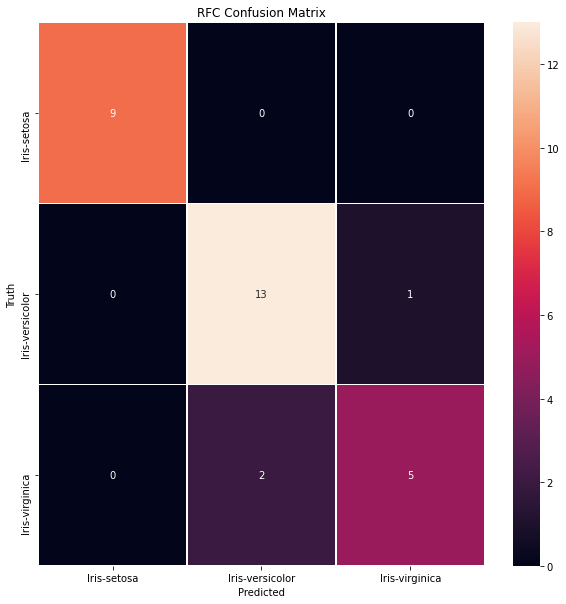

In [86]:
# Returns the y test predictions of the x test inputs - Replace 'None' with New X Data in which you do not have the corresponding y output! 
# defaults to the x testing data # X_train, X_test, y_train, y_test
#aiModel.get_prediction(splitData[1]) #or aiModel.get_prediction(splitData[1]) 
#print(aiModel.get_prediction(splitData[0])) # Takes the X_train data
print(aiModel.get_prediction(None)) 


# Get confusion matrix: If using original trained model, but new Xdata, we need to allow for the passing of the actual Ydata.
# If new Xdata does not have accompanying actual Y data result, this confusion plot should not be called.
#aiModel.get_confusionPlot(splitData[2]) # this is the actual ytrain data - the result should be a diagonal matrix with sparse zeros
aiModel.get_confusionPlot(None)

In [84]:
# Returns the Score of the testing data
print(aiModel.get_testScore())



0.9


0

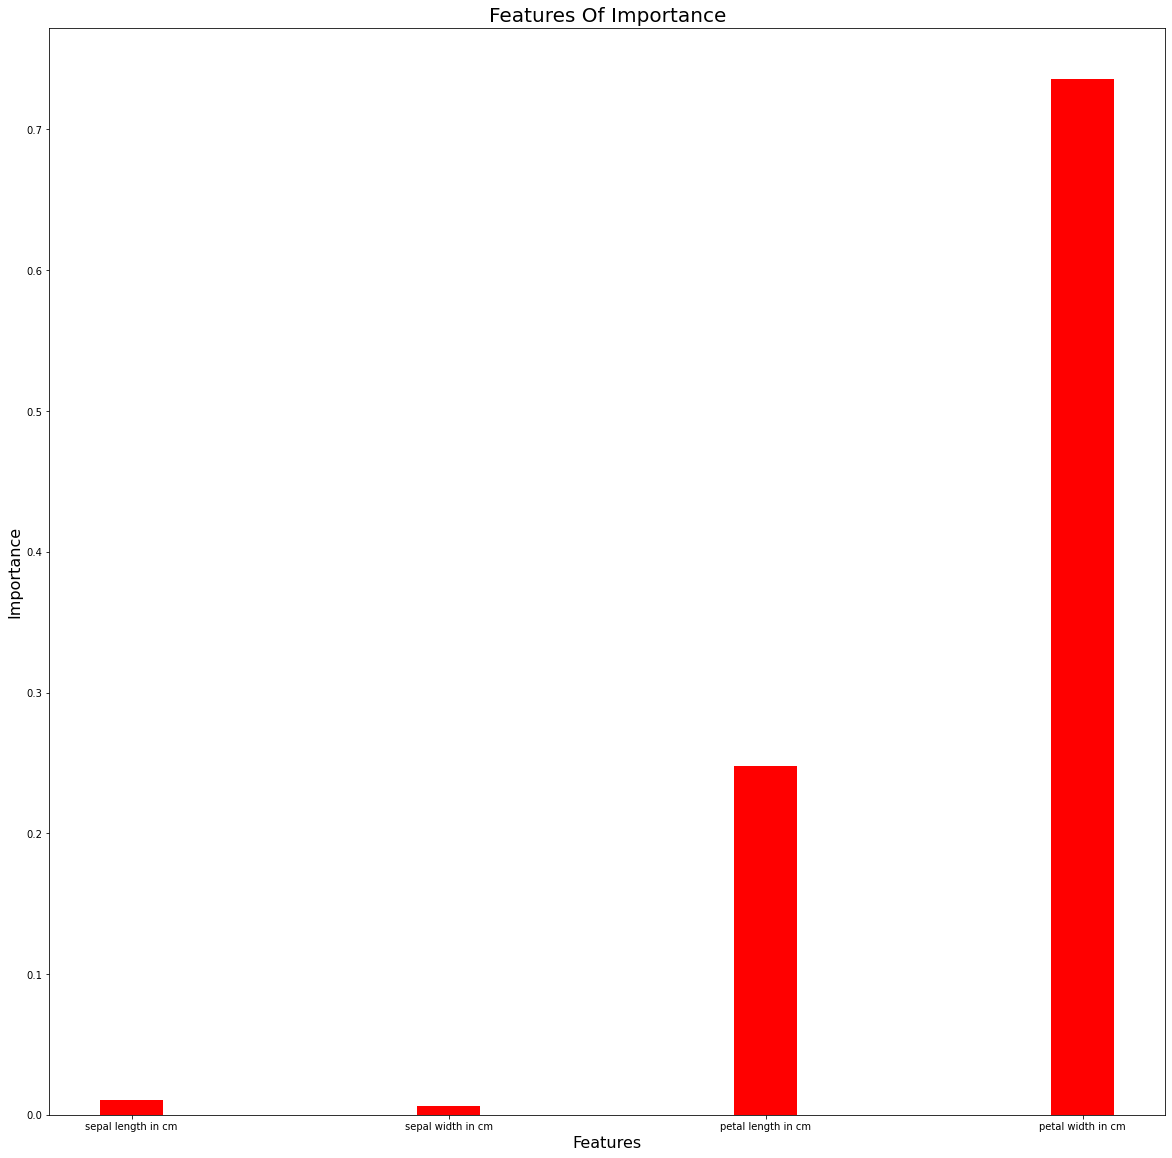

In [83]:
# Get model features of importance - bar graph
aiModel.get_visualPlot()